导入需要的module

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

准备mnist手写数字数据集

In [ ]:
(train_x0,train_y0),(test_x0,test_y0)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


查看数据尺寸和类型

In [ ]:
print(train_x0.shape,train_y0.shape)
print(train_x0.dtype,train_y0.dtype)

(60000, 28, 28) (60000,)
uint8 uint8


转换数据格式

In [ ]:

#转换数据格式,flatten数据并转成float型
train_x=tf.reshape(tf.cast(train_x0,tf.float32)/255.0,(-1,784)) 
#标签转为one-hot
train_label=tf.cast(tf.one_hot(train_y0,depth=10),tf.float32)

test_x=tf.reshape(tf.cast(test_x0,tf.float32)/255.0,(-1,784))
#标签转为one-hot
test_label=tf.cast(tf.one_hot(test_y0,depth=10),tf.float32)


查看转换后的数据格式

In [ ]:
train_x.shape,train_x.dtype,train_label.shape,train_label.dtype

(TensorShape([60000, 784]), tf.float32, TensorShape([60000, 10]), tf.float32)

显示数字图片

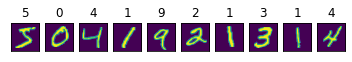

In [ ]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.title(train_y0[i])
  plt.imshow(train_x0[i])
  plt.xticks([])
  plt.yticks([])

分类器模型

In [ ]:
#w0:shape(784,10),b0:shape(10,)
def model_linear(x):
  #自行补充线性拟合 x@w+b
  out=tf.add(tf.matmul(x,w0),b0)
  return tf.nn.softmax(out)


定义损失函数

In [ ]:
#y:观察值  y_hat:模型值
def loss_fun(y,y_hat):
  return tf.reduce_mean(tf.square(y-y_hat))  #自己补充交叉熵

预测精确度函数

In [ ]:
def accuracy_linear(X,label):
  label_pred=model_linear(X)
  return tf.reduce_mean(tf.cast(tf.equal(tf.argmax(label_pred,axis=1),tf.argmax(label,axis=1)),tf.float32))


定义训练函数

In [ ]:
def train_linear(w0,b0):
  epochs=500 #回合数
  
  for epoch in range(epochs):
    l_r=0.3-(0.3-0.01)/epochs*epoch  #学习率

    mnist_batch=tf.data.Dataset.from_tensor_slices((train_x,train_label)).shuffle(train_x.shape[0]).batch(300)
    loss_sum,n=0,0

    for x_train,y_train in mnist_batch:
      with tf.GradientTape() as tape:
        tape.watch([w0,b0])
        y_hat=model_linear(x_train)
        loss=loss_fun(y_train,y_hat)
      gradients=tape.gradient(loss,[w0,b0]) #补充 loss 针对 w0,b0的求导
      w0.assign_sub(l_r*gradients[0])
      b0.assign_sub(l_r*gradients[1])
      loss_sum += loss.numpy()
      n += x_train.shape[0]

    if epoch % 50 ==0:
      print("epoch={} n={} loss={} train_accuracy={}".format(epoch,n,loss_sum/n,accuracy_linear(train_x,train_label)))
      print("   test_accuracy={}".format(accuracy_linear(test_x,test_label)))


训练模型

In [ ]:
#生成变量 w0：shape(784,10),b0:(10,)
w0=tf.Variable(tf.random.truncated_normal((784,10),stddev=0.01))
b0=tf.Variable(tf.zeros((10,)),dtype=tf.float32)

train_linear(w0,b0)

epoch=0 n=60000 loss=0.0002353065986186266 train_accuracy=0.7377166748046875
   test_accuracy=0.7488999962806702
epoch=50 n=60000 loss=4.699207339435816e-05 train_accuracy=0.912933349609375
   test_accuracy=0.916100025177002
epoch=100 n=60000 loss=4.279406595354279e-05 train_accuracy=0.9199333190917969
   test_accuracy=0.9207000136375427
epoch=150 n=60000 loss=4.089387299803396e-05 train_accuracy=0.9231500029563904
   test_accuracy=0.9230999946594238
epoch=200 n=60000 loss=3.976780177714924e-05 train_accuracy=0.925516664981842
   test_accuracy=0.925000011920929
epoch=250 n=60000 loss=3.902199703734368e-05 train_accuracy=0.9268500208854675
   test_accuracy=0.9264000058174133
epoch=300 n=60000 loss=3.850698174598316e-05 train_accuracy=0.9281499981880188
   test_accuracy=0.9269999861717224
epoch=350 n=60000 loss=3.8146102389631174e-05 train_accuracy=0.928933322429657
   test_accuracy=0.9269000291824341
epoch=400 n=60000 loss=3.790217291098088e-05 train_accuracy=0.9294666647911072
   test_

显示识别错误的图片

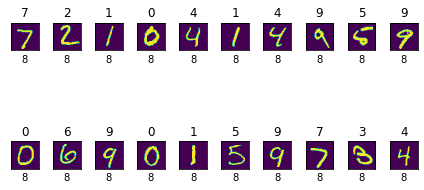

In [ ]:
ind=tf.not_equal(tf.argmax(model_linear(test_x),axis=1),tf.argmax(test_label,axis=1))
test_x_err,test_label_err,model_err=test_x0[ind],test_y0[ind],model_linear(test_x)[ind]

test_x_err=test_x0[ind]
test_label_err=test_y0[ind]
model_err=model_linear(test_x)[ind]


for i in range(20):
  plt.subplot(2,10,i+1)
  plt.title(test_label_err[i])
  plt.imshow(test_x_err[i])
  plt.xticks([])
  plt.yticks([])
  xlabel=str(tf.argmax(model_err[i]).numpy())
  plt.xlabel(xlabel)

plt.tight_layout()